# Nivell 1
#### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Desktop/DataScience/datasets/liga/SP1new.csv')
df=df.iloc[:,5:23]
df.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,D,0,0,D,8,6,1,3,17,13,3,3,4,4,1,0
1,2,0,H,0,0,D,4,9,2,2,8,10,1,2,3,4,0,0
2,0,2,A,0,1,A,12,6,3,4,14,21,6,2,2,2,0,0
3,0,1,A,0,0,D,7,11,2,4,19,17,6,4,3,3,0,0
4,1,1,D,1,0,H,8,8,3,2,15,17,5,3,4,1,0,0


**Columnas:**
1. Div = League Division
2. Date = Match Date (dd/mm/yy)
3. Time = Time of match kick off
4. HomeTeam = Home Team
5. AwayTeam = Away Team
6. FTHG = Full Time Home Team Goals
7. FTAG = Full Time Away Team Goals
8. FTR  = Full Time Result (H=Home Win, D=Draw, A=Away Win)
9. HTHG = Half Time Home Team Goals
10. HTAG = Half Time Away Team Goals
11. HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
12. HS = Home Team Shots
13. AS = Away Team Shots
14. HST = Home Team Shots on Target
15. AST = Away Team Shots on Target
16. HF = Home Team Fouls Committed
17. AF = Away Team Fouls Committed
18. HC = Home Team Corners
19. AC = Away Team Corners
20. HY = Home Team Yellow Cards
21. AY = Away Team Yellow Cards
22. HR = Home Team Red Cards
23. AR = Away Team Red Cards
24. B365H = Bet365 home win odds
25. B365D = Bet365 draw odds
26. B365A = Bet365 away win odds

In [3]:
df.isnull().sum().sum() # no hay nulos

0

In [4]:
# separamos variable explicada 'y' del resto 'X'
X=df.drop('FTR','columns')
y=df.FTR

In [5]:
X.dtypes #tenemos 1 variable categórica HTR

FTHG     int64
FTAG     int64
HTHG     int64
HTAG     int64
HTR     object
HS       int64
AS       int64
HST      int64
AST      int64
HF       int64
AF       int64
HC       int64
AC       int64
HY       int64
AY       int64
HR       int64
AR       int64
dtype: object

In [6]:
X.HTR.unique() #valores de HTR

array(['D', 'A', 'H'], dtype=object)

In [7]:
# creamos dummies
X_dummies=pd.get_dummies(data=X, columns=['HTR'],drop_first=True)
X_dummies.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTR_D,HTR_H
0,0,0,0,0,8,6,1,3,17,13,3,3,4,4,1,0,1,0
1,2,0,0,0,4,9,2,2,8,10,1,2,3,4,0,0,1,0
2,0,2,0,1,12,6,3,4,14,21,6,2,2,2,0,0,0,0
3,0,1,0,0,7,11,2,4,19,17,6,4,3,3,0,0,1,0
4,1,1,1,0,8,8,3,2,15,17,5,3,4,1,0,0,0,1


In [8]:
# vemos que tenemos 3 categorías, para evitar dummy trap con drop_first eliminamos una de las columnas que es explicada por 
# las otras dos. Así que tendríamos dos columnas más que en el dataset original pero como get_dummies ya nos elimina la
# columna sin codificar en X_dummies,solo tendremos 1 columna más que en el original.
X.shape[1], X_dummies.shape[1]

(17, 18)

In [9]:
# Estandarizamos restando la media y dividiendo por la desviación
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_t=scaler.fit_transform(X_dummies) #devuelve un array NumPy, no un DataFrame

In [10]:
X_t.mean(axis=0) #Ahora tenemos media 0

array([ 7.78597965e-17,  3.46043540e-17, -6.19994676e-17, -5.76739234e-18,
        7.49761004e-17, -5.76739234e-17, -8.65108850e-18, -5.76739234e-17,
        1.21115239e-16, -3.46043540e-17,  2.88369617e-17,  4.32554425e-17,
       -1.26882631e-16,  1.21115239e-16,  3.74880502e-17, -4.61391387e-17,
       -8.93945812e-17, -1.44184808e-17])

In [11]:
X_t.std(axis=0) # y desviación 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

# Nivell 2
#### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [12]:
from sklearn.decomposition import PCA

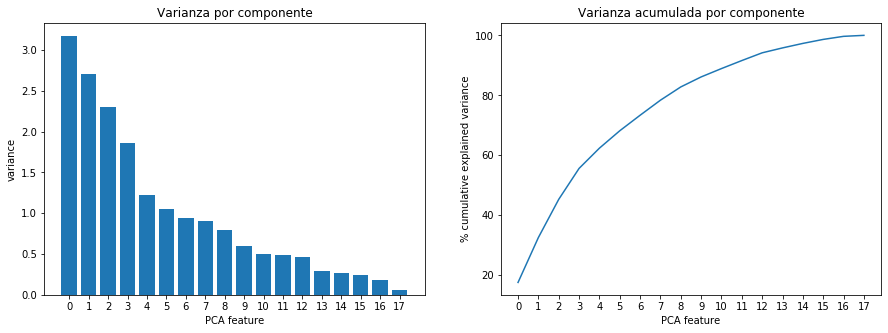

In [13]:
pca=PCA()
pca.fit(X_t)

plt.figure(figsize=(15,5))
#Varianza explicada por cada componente
plt.subplot(1,2,1)
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_) #autovalores
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('Varianza por componente')
plt.xticks(features)
# % de varianza explicada acumulada por cada componente
plt.subplot(1,2,2)
plt.plot(features,pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('PCA feature')
plt.ylabel('% cumulative explained variance')
plt.title('Varianza acumulada por componente')
plt.xticks(features)
plt.show()

In [14]:
# la varianza acumulada por componente
pca.explained_variance_ratio_.cumsum()

array([0.17564775, 0.32554214, 0.45289279, 0.55609663, 0.62365586,
       0.68167458, 0.73350058, 0.78372713, 0.82796092, 0.86132445,
       0.88921512, 0.91592293, 0.9417514 , 0.95811716, 0.97313858,
       0.98646248, 0.99670397, 1.        ])

Vemos en el array que con las 12 primeras componentes PCA tenemos más del 90% de la variancia del dataset. Por lo que podemos reducir el dataset en seis componentes menos, disminuyendo el coste computacional  y perdiendo muy poca información

In [15]:
# Para 12 componentes
pca=PCA(n_components=12)
model=pca.fit_transform(X_t) #convertimos los datos a las nuevas dimensiones
proyecciones = pd.DataFrame(
    model,
    columns = ['PC'+str(i) for i in range(1,13)],
    index=X.index)
print('Nuevas coordenadas dataset:')
proyecciones.head()

Nuevas coordenadas dataset:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.744553,-1.846889,-1.792675,1.640950,0.987563,-1.674657,1.595959,0.943968,1.051073,-0.417836,0.232972,-0.408297
1,-0.655647,-1.335280,-1.504721,-0.273079,0.359309,0.635972,0.888636,-0.742127,0.672937,-0.284944,1.993078,-1.327925
2,-0.721151,-1.232696,1.437926,0.961367,-1.495749,0.554383,-0.048712,0.773591,-0.476492,1.064097,-0.415717,0.330505
3,-1.703060,-1.583061,-0.783402,0.536874,-0.042065,-0.186259,-0.385509,-0.182165,-0.951003,-0.030199,-1.057755,-0.841784
4,0.551021,0.335812,-1.402726,0.782375,-1.361872,-0.443446,-0.059165,0.230152,-0.341063,1.931611,-0.388072,-0.268844


Cada muestra original quedará transformada en una proyección de 12 componentes en el nuevo sistema de coordenadas. El método transform lo que hace es mutiplicar la matriz original X_transf2 por la matriz de pca.components_, que es la matriz de los autovectores

Por ejemplo para la primera muestra de X_transf2 si la multiplicamos por la matriz de pca.components_ obtenemos la primera fila de la proyección de la celda anterior.

In [16]:
X_t[0].dot(pca.components_.T)

array([-1.74455257, -1.84688902, -1.7926747 ,  1.64094968,  0.9875633 ,
       -1.6746568 ,  1.59595937,  0.94396812,  1.05107252, -0.41783577,
        0.23297162, -0.40829651])

In [17]:
pca.components_.shape

(12, 18)

**Interpretación de los nuevos ejes:**

In [18]:
#Creamos un dataframe con los autovectores, así vemos la importancia que tiene cada feature en los nuevos ejes. Cuanto
#mayor sea este valor, teniendo en cuenta el signo, mayor presencia tendrá en este nuevo componente.
eig_vectors=pd.DataFrame(pca.components_.T,columns=['PC'+str(i) for i in range(1,13)],index=df.columns)
eig_vectors

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
FTHG,0.366357,0.294945,0.018114,0.048524,0.078946,0.061799,0.292511,-0.280965,-0.090479,-0.166964,-0.050343,-0.015259
FTAG,-0.228761,0.221658,0.456051,0.118181,-0.126327,-0.013473,-0.003538,-0.065842,0.083646,-0.001788,-0.051302,-0.008528
FTR,0.284672,0.416549,-0.091176,0.075482,-0.037832,0.073265,0.220918,-0.114687,0.003657,-0.078843,-0.196089,-0.206422
HTHG,-0.168265,0.152881,0.489933,0.182948,-0.200799,0.025961,0.069847,-0.068858,0.124301,-0.159582,0.006007,0.245769
HTAG,0.364673,-0.102085,0.296136,0.025408,0.194273,-0.237648,-0.197962,0.134084,-0.194659,-0.040146,0.128282,0.140099
HTR,-0.289081,0.345148,-0.007309,-0.207488,0.306340,-0.023171,-0.103103,0.026666,-0.210007,0.042193,-0.119914,-0.257261
HS,0.398965,0.107822,0.247754,0.007921,0.221226,-0.114743,-0.008626,-0.060235,-0.297736,-0.105801,0.216141,0.236279
AS,-0.283326,0.311031,0.313432,-0.109656,0.165368,0.024551,-0.066814,-0.063647,-0.171080,0.073927,-0.034810,-0.271576
HST,-0.121303,0.016161,-0.231074,0.383305,-0.235553,-0.311537,-0.177862,-0.326873,-0.176027,-0.340051,-0.443911,0.148031
AST,-0.059241,-0.141306,0.042570,0.361719,-0.010906,0.448248,0.290454,0.217583,-0.551050,0.345056,-0.246307,0.152272


Por ejemplo, el componente PC1 tiene una importante relación con HS (0.39), disparos equipo de casa, y FTHG (0.36) y HTAG (0.36), goles marcados por equipo local y visitante respectivamente. 

In [19]:
eig_vectors.loc[np.abs(eig_vectors.loc[:,'PC1'])>=0.3,'PC1']

FTHG    0.366357
HTAG    0.364673
HS      0.398965
Name: PC1, dtype: float64

Y el componente PC2 estaría relacionado en gran parte con FTR (0.41), resultado final, AR (0.38), tarjetas roja equipo casa y HR (-0.36), tarjetas rojas equipo casa donde el signo contrario indica que es inversamente proporcional.

In [20]:
eig_vectors.loc[np.abs(eig_vectors.loc[:,'PC2'])>=0.3,'PC2']

FTR    0.416549
HTR    0.345148
AS     0.311031
HR    -0.364550
AR     0.385687
Name: PC2, dtype: float64

# Nivell 3
#### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

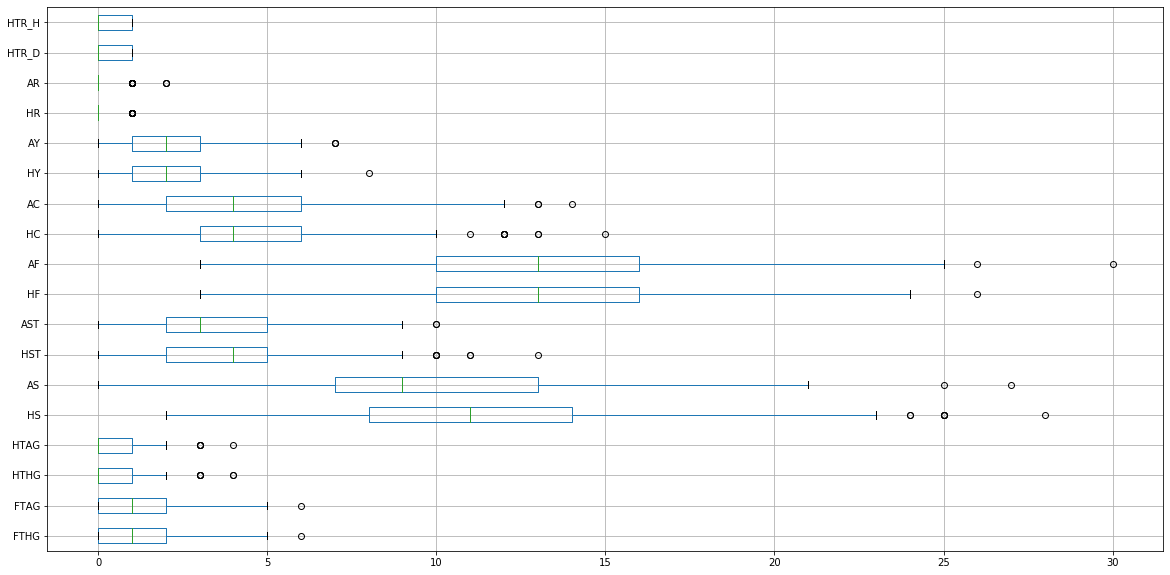

In [21]:
#Vamos a mirar el boxplot para ver los outliers
X_dummies.boxplot(figsize=(20,10),vert=False)
plt.show()

**Eliminación outliers**

In [22]:
#Calculamos el IQR
Q1 = X_dummies.quantile(0.25)
Q3 = X_dummies.quantile(0.75)
IQR = Q3 - Q1
IQR

FTHG     2.0
FTAG     2.0
HTHG     1.0
HTAG     1.0
HS       6.0
AS       6.0
HST      3.0
AST      3.0
HF       6.0
AF       6.0
HC       3.0
AC       4.0
HY       2.0
AY       2.0
HR       0.0
AR       0.0
HTR_D    1.0
HTR_H    1.0
dtype: float64

In [23]:
#Eliminamos muestras con outliers
X_out = X_dummies[~((X_dummies < (Q1 - 1.5 * IQR)) |(X_dummies > (Q3 + 1.5 * IQR))).any(axis=1)]
X_out.shape

(222, 18)

In [24]:
#estandarizamos
X_t=scaler.fit_transform(X_out) #devuelve un array NumPy, no un DataFrame

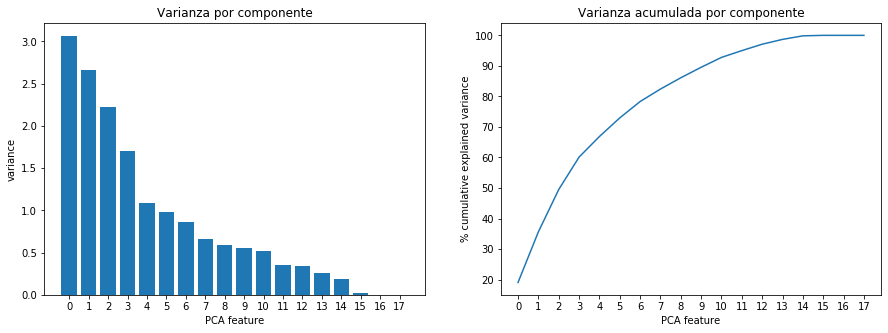

In [25]:
pca=PCA()
pca.fit(X_t)

plt.figure(figsize=(15,5))
#V arianza explicada por cada componente
plt.subplot(1,2,1)
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_) #autovalores
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('Varianza por componente')
plt.xticks(features)
# % de varianza explicada acumulada por cada componente
plt.subplot(1,2,2)
plt.plot(features,pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('PCA feature')
plt.ylabel('% cumulative explained variance')
plt.title('Varianza acumulada por componente')
plt.xticks(features)
plt.show()

In [26]:
# la varianza acumulada por componente
pca.explained_variance_ratio_.cumsum()

array([0.1906523 , 0.35638329, 0.49501591, 0.6012561 , 0.66865875,
       0.72962565, 0.78319133, 0.82413404, 0.86109748, 0.89548607,
       0.92781665, 0.94996814, 0.97097812, 0.98679089, 0.99842544,
       1.        , 1.        , 1.        ])

Vemos una mejora al eliminar los outliers, a costa de eliminar muestras. Ahora con las 10 primeras componentes del PCA llegamos casi al 90% de la varianza del dataset. Antes teníamos 12 componentes.

**RobusScaler**

Usaremos a continuación RobustScaler, normaliza eliminando la mediana que es menos sensible a los outliers y escala
por el IQR

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
transformer = RobustScaler().fit(X_dummies)
X_t=transformer.transform(X_dummies)

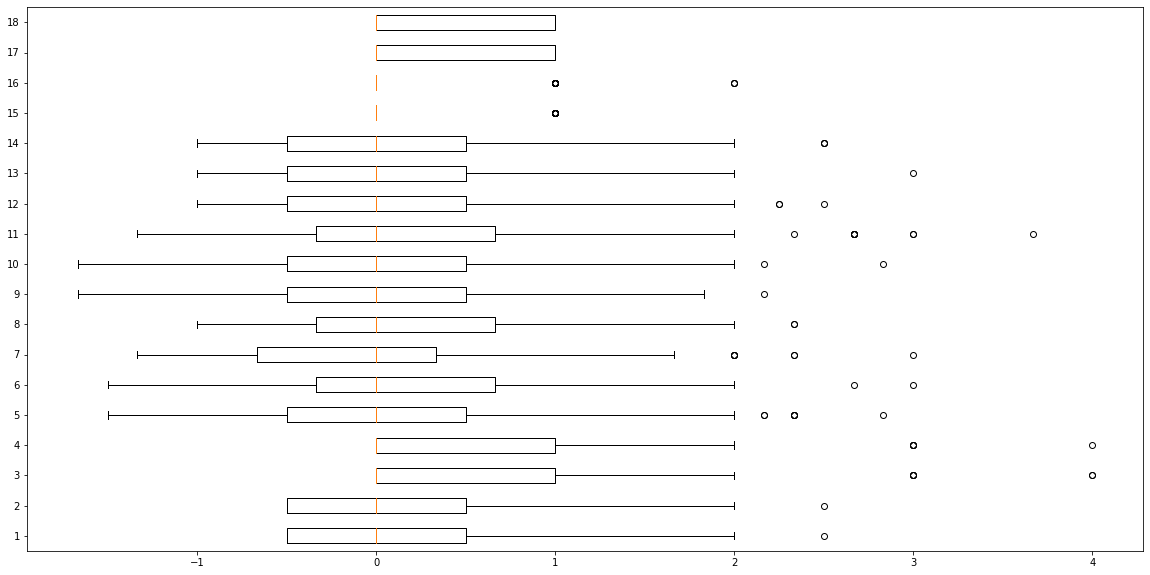

In [29]:
plt.figure(figsize=(20,10))
plt.boxplot(X_t,vert=False)
plt.show()

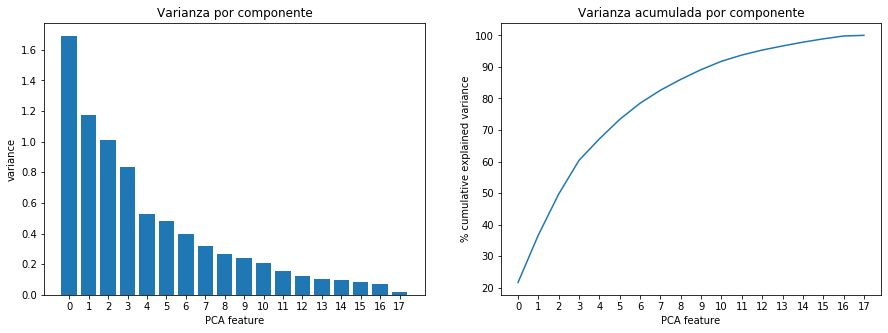

In [30]:
pca=PCA()
pca.fit(X_t)

plt.figure(figsize=(15,5))
#V arianza explicada por cada componente
plt.subplot(1,2,1)
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_) #autovalores
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('Varianza por componente')
plt.xticks(features)
# % de varianza explicada acumulada por cada componente
plt.subplot(1,2,2)
plt.plot(features,pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('PCA feature')
plt.ylabel('% cumulative explained variance')
plt.title('Varianza acumulada por componente')
plt.xticks(features)
plt.show()

In [31]:
# la varianza acumulada por componente
pca.explained_variance_ratio_.cumsum()

array([0.2168796 , 0.36749223, 0.49722901, 0.60407448, 0.67200055,
       0.73375826, 0.78504643, 0.82615071, 0.86054856, 0.8914061 ,
       0.91783436, 0.9376478 , 0.95332074, 0.96636298, 0.97835701,
       0.98887602, 0.99794412, 1.        ])

Tiene un comportamiento similar a la eliminación de outliers llegamos casi al 90% también con 10 componentes. Pero no hemos eliminado ninguna muestra.
Comprobamos que los outliers afectan al PCA!!!